<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/class-N-classification-deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [ ]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('credit_cards_dataset.csv')

In [ ]:
df.columns

In [ ]:
len(df.columns)

In [ ]:
#for setting up train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
y = df['default.payment.next.month']
X = df.drop(columns = 'default.payment.next.month')

In [ ]:
X.shape[1]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 24)
(6000, 24)
(24000,)
(6000,)


In [63]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
type(X_train)

In [64]:
import pandas as pd


In [65]:
train_df = pd.DataFrame(X_train)

In [ ]:
train_df.describe().round()

In [69]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[24]),
    layers.Dropout(0.35),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.35),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.35),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1024)              25600     
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_6 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_7 (Batc  (None, 1024)             4096      
 hNormalization)                                      

In [71]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [75]:
model.compile(
    optimizer='adam', #rmsprop
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1024)              25600     
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_6 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_7 (Batc  (None, 1024)             4096      
 hNormalization)                                      

In [77]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=300,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/300
94/94 [==============================] - 3s 15ms/step - loss: 0.5976 - accuracy: 0.7456 - val_loss: 0.4692 - val_accuracy: 0.7923
Epoch 2/300
94/94 [==============================] - 1s 11ms/step - loss: 0.4800 - accuracy: 0.8053 - val_loss: 0.4621 - val_accuracy: 0.8067
Epoch 3/300
94/94 [==============================] - 1s 12ms/step - loss: 0.4624 - accuracy: 0.8109 - val_loss: 0.4551 - val_accuracy: 0.8077
Epoch 4/300
94/94 [==============================] - 1s 11ms/step - loss: 0.4487 - accuracy: 0.8140 - val_loss: 0.4376 - val_accuracy: 0.8138
Epoch 5/300
94/94 [==============================] - 1s 11ms/step - loss: 0.4445 - accuracy: 0.8162 - val_loss: 0.4405 - val_accuracy: 0.8145
Epoch 6/300
94/94 [==============================] - 1s 12ms/step - loss: 0.4398 - accuracy: 0.8162 - val_loss: 0.4445 - val_accuracy: 0.8123
Epoch 7/300
94/94 [==============================] - 1s 11ms/step - loss: 0.4411 - accuracy: 0.8166 - val_loss: 0.4353 - val_accuracy: 0.8173
Epoch 

Minimum Validation Loss: 0.4342


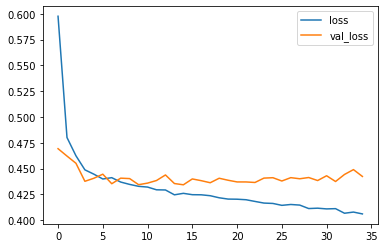

In [78]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [ ]:
type(X_test)

In [ ]:
X_test.shape

In [ ]:
red_wine.head(3)

In [ ]:
X_test[:5]

In [79]:
#making the predictions
dnn_pred = model.predict(X_test)

In [80]:
dnn_pred.shape

(6000, 1)

In [86]:
dnn_pred[100:105].round()

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [82]:
dnn_pred_int = dnn_pred.round()

In [ ]:
dnn_pred_int

In [ ]:
pd.DataFrame(dnn_pred_int, columns = ['quality']).groupby(['quality']).size()

In [87]:
y_test[100:105]

8241     1
11948    0
13818    0
2411     0
25650    0
Name: default.payment.next.month, dtype: int64

In [ ]:
type(y_test)

In [ ]:
pd.DataFrame(y_test).groupby(['quality']).size()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#getting our results
dnn_mse = mean_squared_error(y_test,dnn_pred)

In [ ]:
#printing rmse
print("MSE =",(round(dnn_mse,2)))

In [ ]:
#result table
from tabulate import tabulate

In [ ]:
#gathering the results
result_table = [['Deep Learning', round(dnn_mse,2)]]

#defining header names
col_names = ["Model", "MSE"]

#creating a results table
print(tabulate(result_table, headers=col_names))

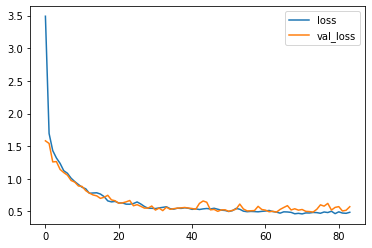

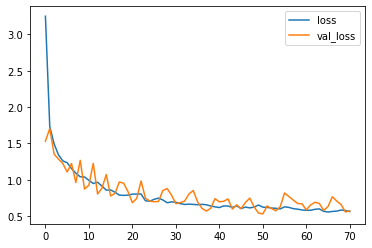

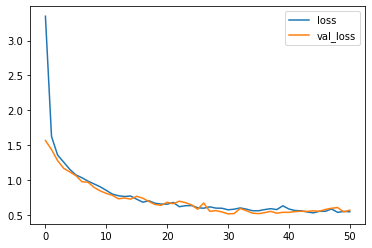

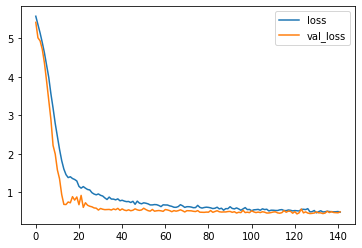

### https://keras.io/guides/serialization_and_saving/

In [ ]:
model.save("my_model")

In [ ]:
!ls -l ./my_model/

In [ ]:
recon_model = keras.models.load_model("my_model")

In [ ]:
import numpy as np

In [ ]:
np.testing.assert_allclose(
    model.predict(X_test), recon_model.predict(X_test)
)

In [ ]:
recon_model.fit(X_test, y_test)

In [ ]:
X_test[:11]

In [ ]:
y_test[:11]

In [ ]:
dnn_pred = model.predict(X_test)

In [ ]:
dnn_pred.shape

In [ ]:
dnn_pred_int = dnn_pred.round()

In [ ]:
dnn_pred_int_df = pd.DataFrame(dnn_pred_int, columns = ['quality'])

In [ ]:
dnn_pred_int_df.groupby('quality').size()

In [ ]:
y_test[:11]

In [ ]:
dnn_mse_Int = mean_squared_error(y_test[:11],dnn_pred_int)

In [ ]:
print("MSE Int =",(round(dnn_mse_Int,2)))

In [ ]:
type(y_test)

In [ ]:
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_test_df.groupby('quality').size()

In [ ]:
type(X_train)

In [ ]:
X_train.shape

In [ ]:
x_train_df = pd.DataFrame(X_train)

In [ ]:
y_train_df = pd.DataFrame(y_train)

In [ ]:
y_train_df.groupby('quality').size()